In [116]:
# Pandas is most commonly used for data wrangling and data manipulation purposes
# NumPy is a fundamental library for numerical computing in Python.Mathematical Operations, Arrays,Linear Algebra etc
#Removing Duplicates
#Fixing NULL values(Region,NA_Sales)
# Standardizing categorical values(Country)
#Renaming Columns
#Handling Outliers(Global Sales)

#Create a Bar Chart('National Sales by Region and Country)
#Create Box Plot('Global Sales By Platform)

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv('C:/Users/R.R.SAHAY/Downloads/VideoGamesProject-main/VideoGamesProject-main/VideoGamesSales.csv')
df.head(50)


,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,NA_Sales,Global_Sales,NA_Profit,Global_Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,$41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,$29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,$15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,$15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,$11.27,31.37,3.381,9.411
5,6,Tetris,GB,2010,Jun,Puzzle,Nintendo,USA,Newark,Ohio,East,$23.20,30.26,6.960,9.078
6,7,New Super Mario Bros.,DS,2010,Jul,Platform,Nintendo,USA,Fremont,Nebraska,Central,$11.38,30.01,3.414,9.003
7,8,Wii Play,Wii,2010,Aug,Misc,Nintendo,USA,Odessa,Texas,Central,$14.03,29.02,4.209,8.706
8,9,New Super Mario Bros. Wii,Wii,2010,Sep,Platform,Nintendo,USA,Fairfield,Ohio,East,$14.59,28.62,4.377,8.586
9,9,New Super Mario Bros. Wii,Wii,2010,Sep,Platform,Nintendo,USA,Fairfield,Ohio,East,$14.59,28.62,4.377,8.586


In [119]:
# df[df.duplicated()]
df=df.drop_duplicates()
df['NA_Sales']=df['NA_Sales'].replace('[$]','',regex=True)
df['Region']=df['Region'].fillna('North')
df['NA_Sales']=pd.to_numeric(df['NA_Sales'],errors='coerce')
avg_sales = df['NA_Sales'].mean()
avg_sales
df['NA_Sales']=df['NA_Sales'].fillna(avg_sales)


In [120]:

df['Country']=df['Country'].replace({'USA':'United States'})
df['Country']=df['Country'].str.title()
df=df.rename(columns={'NA_Sales':'National Sales','Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'})

sales_cap = df['National Sales'].quantile(0.95)
sales_cap
df['National Sales'] = np.where(df['National Sales']>sales_cap,sales_cap,df['National Sales'])
df.head(2)

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,2.07,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,2.07,40.24,8.724,12.072


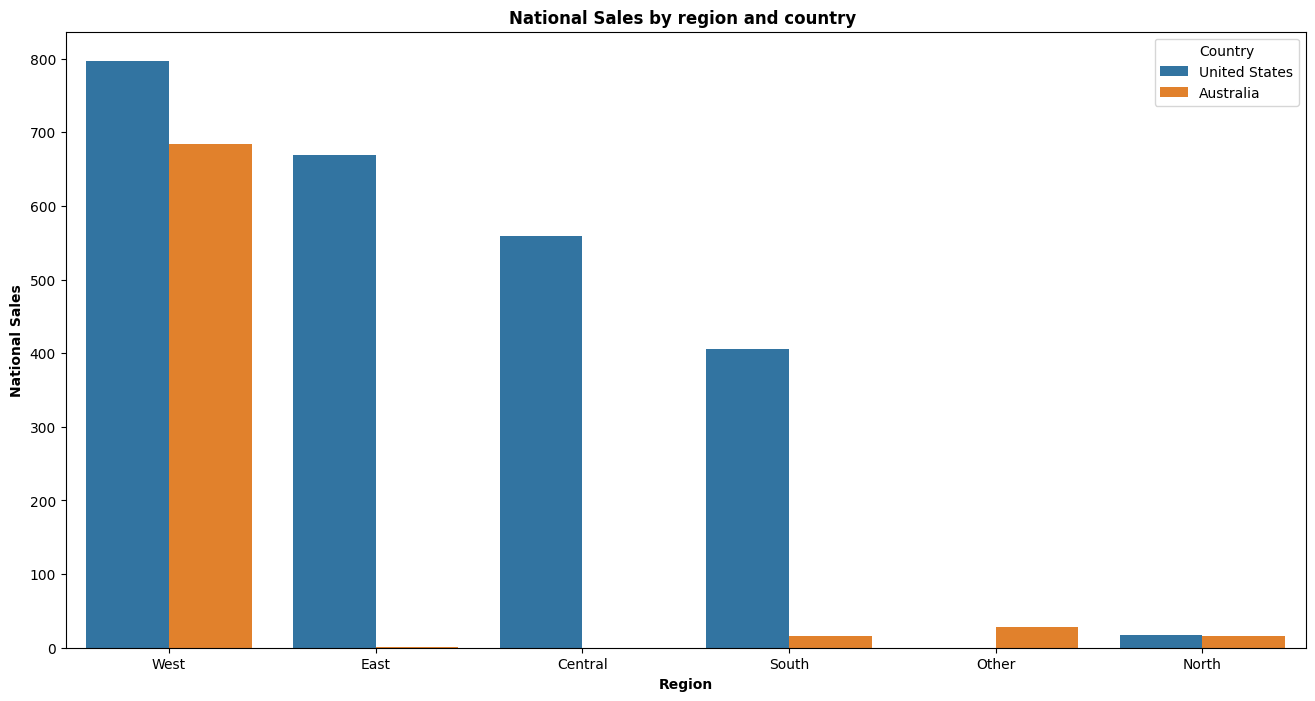

In [121]:
National_Sales = df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales',ascending=False)
National_Sales
plt.figure(figsize=(16,8))
# sns.barplot(data = National_Sales)
sns.barplot(data=National_Sales,x='Region',y='National Sales',hue='Country')
plt.title('National Sales by region and country ',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

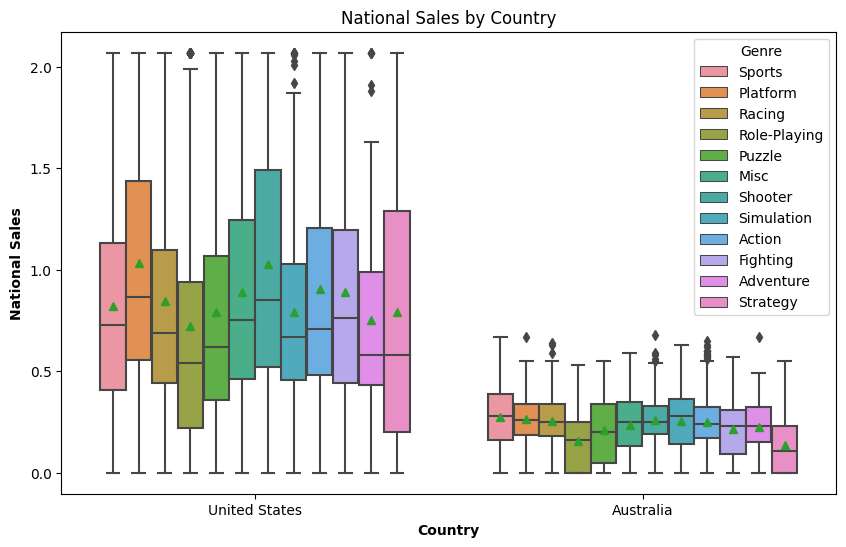

In [122]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Country',y='National Sales',data=df,showmeans=True,hue='Genre')
plt.title('National Sales by Country')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

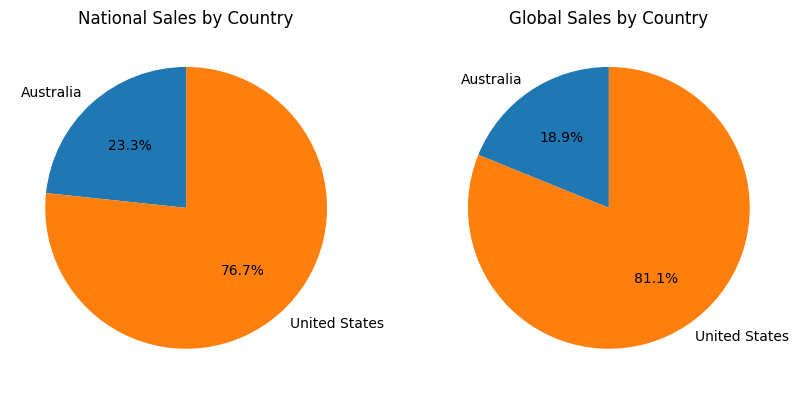

In [123]:
Sales = df.groupby(['Country'])[['National Sales','Global Sales']].sum().reset_index()
Country=Sales['Country']
National_Sales=Sales['National Sales']
Global_Sales=Sales['Global Sales']
fig,axs=plt.subplots(1,2,figsize=(10,7))
axs[0].pie(National_Sales,labels=Country,autopct='%1.1f%%',startangle=90)
axs[0].set_title('National Sales by Country')

axs[1].pie(Global_Sales,labels=Country,autopct='%1.1f%%',startangle=90)
axs[1].set_title('Global Sales by Country')
plt.show()

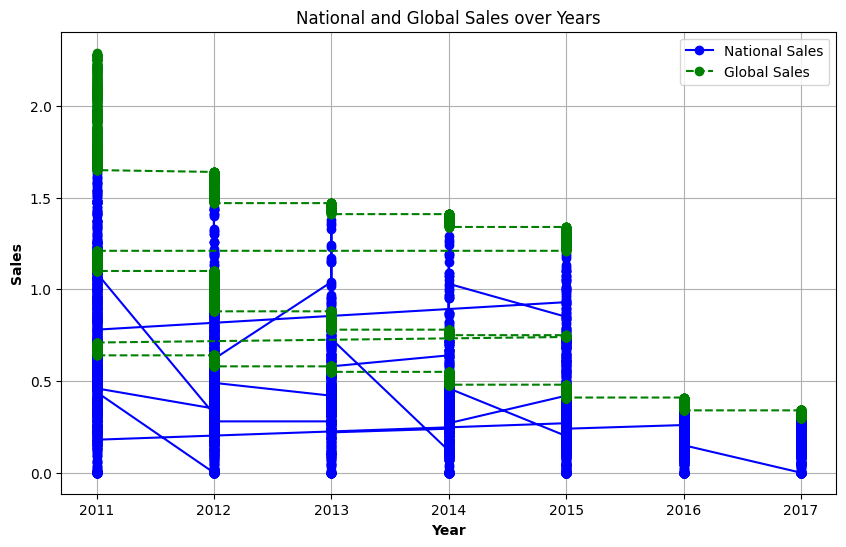

In [124]:
import matplotlib.pyplot as plt

# Filtering data for the years 2011 to 2017
filtered_df = df[df['Year'].between(2011, 2017)].copy()

# Limiting sales values to a maximum of 10
filtered_df['National Sales'] = filtered_df['National Sales'].clip(upper=10)
filtered_df['Global Sales'] = filtered_df['Global Sales'].clip(upper=10)

plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Year'], filtered_df['National Sales'], marker='o', linestyle='-', color='b', label='National Sales')
plt.plot(filtered_df['Year'], filtered_df['Global Sales'], marker='o', linestyle='--', color='g', label='Global Sales')

plt.title('National and Global Sales over Years')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Sales', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()
